# 什么是linked list
链表是通过指针串联起来的线性结构，每个节点有两部分组成，一个是数据域(存放数据的地方),一个是指针域(指向下一个方向),最后一个指针域指向null(空指针)，链表的入口节点称为头(head)。

链表分为下面三种类型

- single linked list
- double linked list
- circular linked list

一般的链表形式(也就是单链表)：
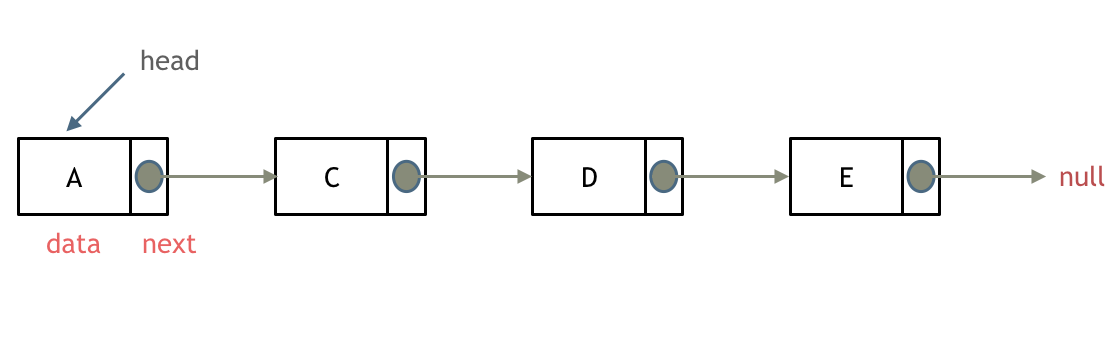



### 双链表(double linked list)

单链表只能指向节点的下一个节点，而双链表的每个节点有两个指针域，一个指向上一个节点，一个指向下一个节点

如图：
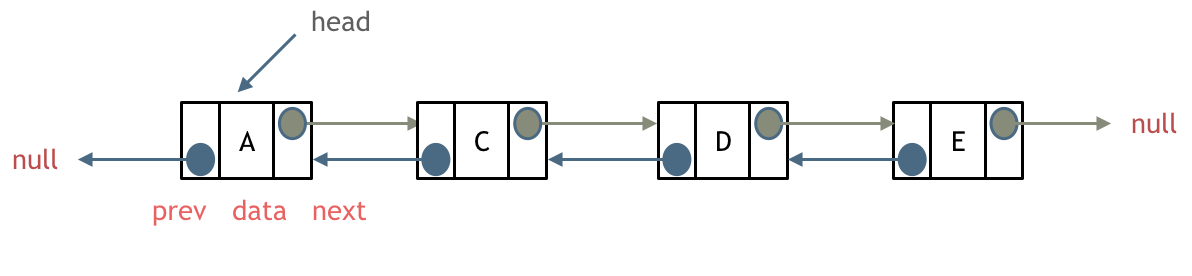


### 循环链表(circular linked list)

链表的首尾相连

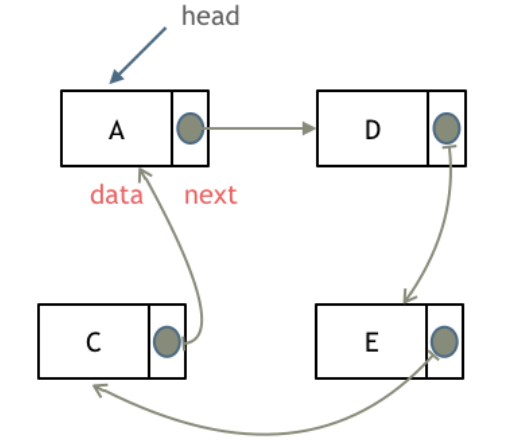

## 链表的储存类型

链表的储存是**随机且分散**的，他不像数组那样是连续分布，而是散乱在内存中的某地址上，分配机制取决于操作系统的内容管理。

如图随所示：

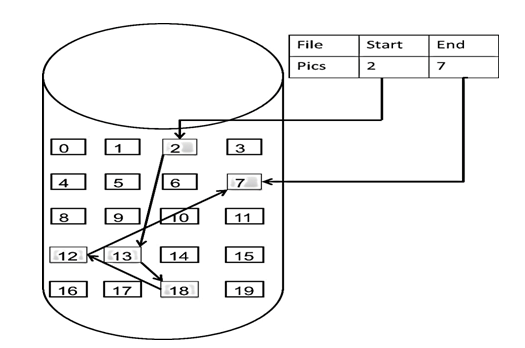

这个链表的起始节点为2，endnode为7，各个节点分布在内存的不同地址空间上，通过指针串联在一起。

数组的储存类型(连续):

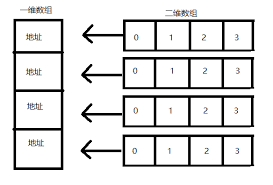


## The define of linked list

在python中，并没有像C语言的指针概念，用的是**引用(Reference)**。在我们写'a = b'时，实际上是让'a'指向了内存中'b'指向的那个对象地址。
``` python
class Listnode:
    def __init__(self,val = 0, next = None):
        '''
        val:储存当前节点的值
        next:储存下一个节点的引用(linked list)
        '''
        self.val = val
        self.next = next
```

In [1]:
class ListNode:
    def __init__(self, val = 0, next = None):
        self.val  = val
        self.next = next

#手动创建链表

node1 = ListNode(2)
node2 = ListNode(13)
node3 = ListNode(18)

#此时所有的指针都是指向None
node1.next = node2
node2.next = node3

# 3. 验证连接
print(node1.val)             # 输出 2
print(node1.next.val)        # 输出 13 (通过 node1 找到了 node2)
print(node1.next.next.val)   # 输出 18 (通过 node1 连跳两次找到了 node3)

2
13
18


In [2]:
curr = node1 #curr和node1都指向内存中那个值为2的盒子
curr = curr.next#curr现在指向node2值为13的盒子

## 🔗链表的操作
- 删除节点
- 添加节点

---

### ❌1.删除节点

在数组中，删除一个元素需要把后面的所有元素都往前挪一步($ O(n) $);但是在Linked List中,删除操作之需要**跳过**那个节点($O(1)$)

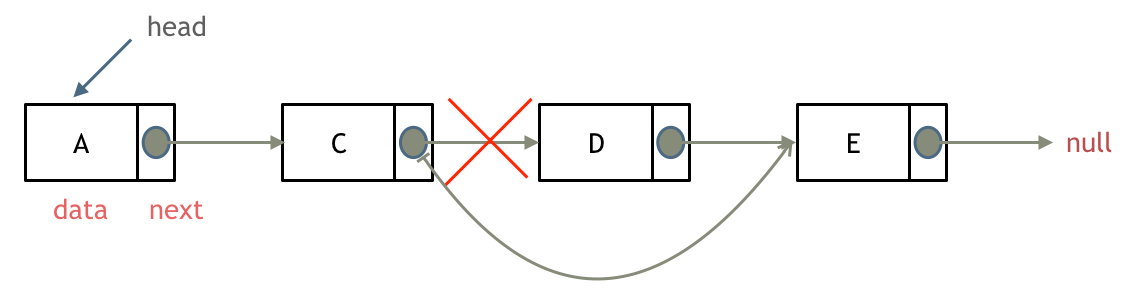

只需要讲C节点的next指针指向E节点即可，python中不用手动释放D的内存

#### 场景 A：已知要删除节点的前驱节点 `prev`
```python
    # 假设结构是：prev -> target -> next_node
    # 我们想删掉 target
    prev.next = prev.next.next
```

**逻辑严谨性**：我们需要确保prev不为空，且prev.next也不为空

---

#### 场景 B：只给一个`head`和一个目标值'val'

我们需要删除所有值为val的节点

💡 **算法思路：哨兵节点 (Dummy Node)**

1. **建立哨兵**：在原链表前增加一个伪节点。

2. **巡逻检查**：通过 `curr.next` 检查下一个节点的值。

3. **执行跳过**：若命中 `val`，则改变指针；否则` curr` 后移。
```python
def delete_node(head,val):
    # 第一步：建立哨兵。内存中变成：[0(dummy)] -> [1] -> [2] -> [6] -> [3]
    dummy = ListNode(0)
    dummy.next = head

    # 第二步：curr 指向 dummy。此时 curr 在 1 的前面。
    curr = dummy

    # 第三步：开始巡逻。只要我后面还有节点，我就检查它
    while curr.next:
        if curr.next.val == val:
            #发现下一个节点是val
            #指针跳过这个节点，意味着删除
            curr.next = curr.next.next

        else
            curr = curr.next
        
    return dummy.next #返回新的head


```

---

### ✅2.添加节点

假设我们要在节点`a`&`b`之间插入一个新节点`new`。

1. **创建新节点**：先实例化一个ListNode(val)
2. **新节点接后妈**：让`new.next`指向`B`(即`A.next`)。必须先这样做，不然会丢失`b`的地址。
3. **老节点换新宠**:让`A.next`指向`new`

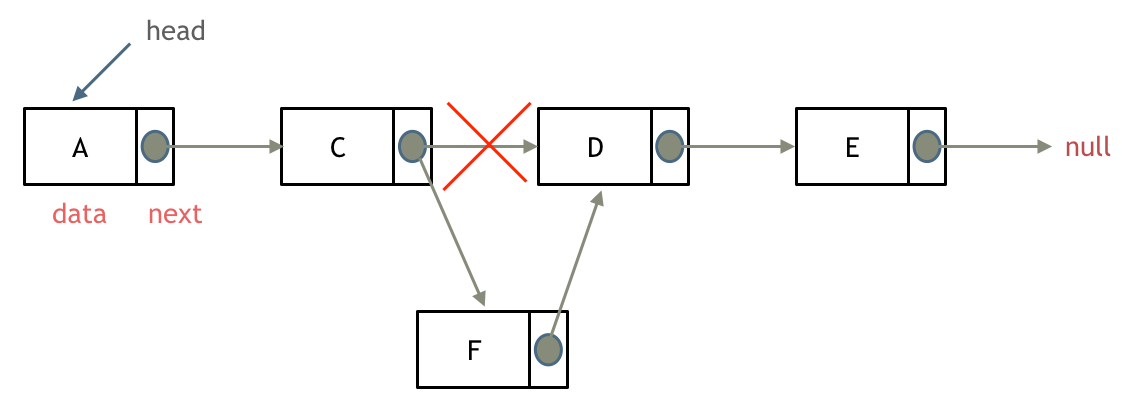

---

例：在第`index`个节点后插入一个值为`val`的节点
```python
def add_node(head, index, val):
    dummy = ListNode(0)
    dummy.next = head
    curr = dummy
    
    # 1. 找到要插入位置的前驱节点 (第 index 个)
    for _ in range(index):
        if curr.next:
            curr = curr.next
        else:
            break # 索引超出范围
            
    # 2. 执行插入逻辑
    new_node = ListNode(val)
    
    # 先把新节点的屁股和后面的部队连上
    new_node.next = curr.next
    
    # 再把前面节点的头和新节点连上
    curr.next = new_node
    
    return dummy.next
```

---

## 性能分析

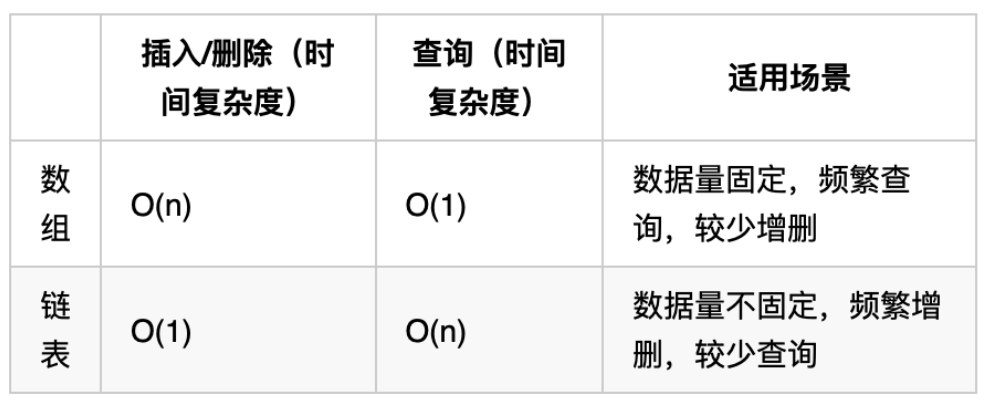